In [1]:
# SETUP: Install and verify all required packages (run once)
# --------------------------------------------------------------
# This cell installs machine learning, data processing, visualization,
# and fairness-audit libraries used throughout the notebook.
# It also prints the installed versions to ensure compatibility.

# AIF360 can be tricky to install in some environments; use fairlearn if AIF360 fails.
# !pip install --quiet fairlearn==0.9.0    # <-- comment is OK, but NO ! at start if you want it ignored



# Install core scientific Python packages
# These packages handle data analysis, ML, plotting, and Jupyter UI.
!pip install --quiet pandas numpy scikit-learn matplotlib seaborn jupyterlab

# Install AIF360 (IBM Fairness Toolkit)
# AIF360 is used for advanced fairness checks such as:
# - Statistical Parity Difference
# - Disparate Impact
# - Equal Opportunity Difference
#
# NOTE:
# AIF360 can be difficult to install in some Python environments.
# The "|| true" ensures that even if installation fails,
# the notebook will continue running instead of stopping.

!pip install --quiet aif360 || true

# Ensure fairlearn installs in correct environment
# Install Fairlearn (Microsoft Fairness Toolkit)
# Fairlearn provides:
# - Simpler fairness metrics
# - Model comparison dashboards
# - Bias evaluation tools
# Using {sys.executable} ensures the package is installed
# inside the SAME Python environment that Jupyter Notebook uses.

import sys
!{sys.executable} -m pip install fairlearn==0.9.0


# Import installed packages and print versions
# This helps confirm that installation was successful
# and that the correct versions are loaded.

import pandas as pd # Data manipulation library
import numpy as np # Numerical computing library
import sklearn # Machine learning toolkit
import matplotlib # Visualization library
import seaborn # Visualization library (built on matplotlib)
import fairlearn # Fairness metrics toolkit

# Print versions of key packages
print('python', sys.version.split()[0]) # Python version
print('pandas', pd.__version__)  # Pandas version
print('numpy', np.__version__)   # NumPy version
print('scikit-learn', sklearn.__version__) # Scikit-learn version

# Check whether AIF360 installed correctly
# If it fails, the notebook will still continue,
# and Fairlearn can be used instead.

try:
    import aif360
    print('aif360', aif360.__version__)
except Exception as e:
    print('aif360 not available:', e)

print('fairlearn', fairlearn.__version__)

python 3.13.5
pandas 2.2.3
numpy 2.1.3
scikit-learn 1.6.1
aif360 0.6.1
fairlearn 0.9.0


In [2]:
# Kaggle download (uncomment and run if you have kaggle.json configured)

# !mkdir -p ~/.kaggle (Creates the .kaggle directory in the user's home folder to store credentials)

# !cp /path/to/kaggle.json ~/.kaggle/kaggle.json ( Copies your Kaggle API key to the correct folder (update /path/to/)

# !chmod 600 ~/.kaggle/kaggle.json ( Restricts permissions on kaggle.json for security (required by Kaggle API)

# !kaggle datasets download -d kushasahu/bank-dataset-for-fairness -p ./data --unzip ( Downloads and unzips the "Bank Dataset for Fairness" into ./data directory)


# If you uploaded the dataset manually (drag & drop in Jupyter),
# we create a folder named "Data" to store it and avoid clutter.

import os  # os module allows us to work with file paths and directories

DATA_DIR = './Data'  # Directory where the dataset will be stored
os.makedirs(DATA_DIR, exist_ok=True)

# The os.path.join ensures the path works on Windows, Mac, or Linux.
DATA_PATH = os.path.join(DATA_DIR, 'bank.csv.csv')  # <- update if the filename differs

# Print Diagnostic Information For The User This helps verify:
# Where the notebook expects the data folder to be
# What path it is looking for when loading the dataset 

print('Data dir:', os.path.abspath(DATA_DIR))
print('Expected data path (update if needed):', DATA_PATH)

Data dir: C:\Users\jacqu\Data
Expected data path (update if needed): ./Data\bank.csv.csv


In [5]:
# Load dataset and show top rows and columns
# This section loads the dataset from the path specified in DATA_PATH,
# shows the first few rows, and prints the column names.
# It also checks whether the file exists to avoid runtime errors.

import pandas as pd  # pandas is used for loading and manipulating datasets
import os            # os is used to check if the dataset file exists on disk

# Make sure DATA_PATH was defined earlier in the notebook
# Example: DATA_PATH = "bank_dataset_fairness.csv"
DATA_PATH = "bank.csv.csv"

# Check whether the dataset file exists at the given path.
if os.path.exists(DATA_PATH):

    # Read the CSV file into a DataFrame
    df = pd.read_csv(DATA_PATH)

    # Print the number of rows and columns to confirm successful loading
    print('Loaded dataset shape:', df.shape)

    # Display the first 10 rows to give an overview of the data structure
    display(df.head(10))

    # Print a list of all column names
    print('\nColumns:')
    print(list(df.columns))

else:
    # Error message if path is incorrect or file is missing
    print('DATA_PATH does not exist. Please upload the CSV file or set DATA_PATH correctly.')


Loaded dataset shape: (10000, 15)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,PotentialCustomer
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,4,1,0,299756.71,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,4,1,1,160062.80,0,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1
8,9,15792365,He,501,France,Male,44,4,142051.07,4,0,1,224940.50,0,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,3,1,1,221725.73,0,1



Columns:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'PotentialCustomer']


In [8]:
# --- USER: set these variables after inspecting df.columns ---
# Example placeholders (replace with actual column names from the dataset):
label_col = 'Exited'               # e.g., 'y' or 'target' (binary target)
positive_label = 1            # or 'yes' depending on dataset encoding
protected_attr = 'Gender'     # e.g., 'sex', 'marital', 'age_group'
privileged_value = 'Male'     # set based on dataset values
unprivileged_value = 'Female' # set based on dataset values
 
# If protected attribute is continuous (like 'age'), create age buckets:
if 'age' in (list(globals().get('df', pd.DataFrame()).columns) if 'df' in globals() else []):
    print('Consider creating age buckets, e.g. df["age_group"] = pd.cut(df.age, bins=[0,30,60,120], labels=["<30","30-60",">60"])')
 

In [10]:
# Preprocessing: simple example pipeline (adjust per actual dataset)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Safety check: ensure the dataset df is loaded
assert 'df' in globals(), "Dataset not loaded. Run the data loading cell first."

# Ensure label is numeric 0/1
print('Unique label values before mapping:', df[label_col].unique()[:10])

# --- FIXED INDENTATION BELOW ---
# Convert label if it is string (yes/no)
if df[label_col].dtype == object:
    df[label_col] = df[label_col].map({'yes':1, 'no':0, 'Yes':1, 'No':0})

    # Attempt numeric conversion (in case it contains "1"/"0" as strings)
    try:
        df[label_col] = pd.to_numeric(df[label_col])
    except:
        pass   # If still failing, user must clean manually
# --- END FIX ---

# Separate features and label
X = df.drop(columns=[label_col])
y = df[label_col]

# Extract protected attribute
if protected_attr not in X.columns:
    print('Protected attribute', protected_attr, 'not in features; check column name.')
    protected = None
else:
    protected = X[protected_attr]

# One-hot encode features (EXCEPT protected attribute)
if protected_attr in X.columns:
    X_enc = pd.get_dummies(X.drop(columns=[protected_attr]), drop_first=True)
else:
    X_enc = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.3, stratify=y, random_state=42
)

# Align protected attribute with train/test indexes
if protected_attr in df.columns:
    protected_train = df.loc[X_train.index, protected_attr]
    protected_test = df.loc[X_test.index, protected_attr]
else:
    protected_train = pd.Series(index=X_train.index, data=[None]*len(X_train))
    protected_test = pd.Series(index=X_test.index, data=[None]*len(X_test))

# Print verification
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Unique label values before mapping: [1 0]
Train shape: (7000, 2944)
Test shape: (3000, 2944)


In [11]:
# Baseline classifier: Logistic Regression pipeline

# Import the make_pipeline function that allows us to easily chain preprocessing steps and a model into a single pipeline
from sklearn.pipeline import make_pipeline

# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Import StandardScaler for feature standardization (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler

# Import performance metrics: accuracy, AUC, precision, recall
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Create a pipeline that first scales the numeric features, then applies Logistic Regression
# max_iter increases iterations to guarantee convergence of the optimizer
# random_state ensures reproducibility
clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Train (fit) the pipeline using the training features (X_train) and labels (y_train)
clf.fit(X_train, y_train)

# Predict the class labels (0/1) for the test dataset
y_pred = clf.predict(X_test)

# Attempt to compute predicted probabilities.
# Some models might not support predict_proba, so we use try/except to avoid errors.
try:

# Extract the probability of the positive class (class 1)
    y_prob = clf.predict_proba(X_test)[:,1]

except:
 # If predict_proba is unavailable, set y_prob to None so we avoid AUC calculation
    y_prob = None
 
# Print the accuracy score, which measures the proportion of correctly classified instances
print('Accuracy:', accuracy_score(y_test, y_pred))

# If probability predictions are available, compute and print AUC (Area Under ROC Curve)
if y_prob is not None:
    print('AUC:', roc_auc_score(y_test, y_prob))

# Print precision (positive predictive value)
# zero_division=0 avoids errors if the model predicts no positive samples
print('Precision:', precision_score(y_test, y_pred, zero_division=0))

# Print recall (true positive rate)
# zero_division=0 avoids errors if there are no positive predictions
print('Recall:', recall_score(y_test, y_pred, zero_division=0))
 

Accuracy: 0.7666666666666667
AUC: 0.6241050258310218
Precision: 0.37604456824512533
Recall: 0.220949263502455


In [12]:
# Fairness metrics using Fairlearn MetricFrame
#Import MetricFrame for group-wise fairness evaluation,

from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, false_positive_rate

# Import standard model evaluation metrics from sklearn
from sklearn.metrics import accuracy_score, roc_auc_score
 
# Assign the protected attribute column (e.g., gender, age group) for fairness evaluation.
# 'protected_test' should correspond to the protected attribute in the test set.
groups = protected_test

# Create a MetricFrame object to compute multiple metrics overall and for each demographic group.
# We define a dictionary of metrics that will be computed.

mf = MetricFrame(metrics={'accuracy': accuracy_score, # Measures correct predictions proportion

                          'selection_rate': selection_rate, # Measures the rate at which the model predicts the positive class

                          'tpr': true_positive_rate,  # True Positive Rate (recall for positive class

                          'fpr': false_positive_rate}, # False Positive Rate (false alarms)

                 y_true=y_test, # Actual labels from the test set
                 y_pred=y_pred, # Predicted labels from the model 
                 sensitive_features=groups) # Protected attribute used for grouping (e.g., gender group)


# Print the overall values for each metric across the full test dataset
print('Overall metrics:')
print(mf.overall)

# Print fairness metrics broken down by each protected group
# 'display' provides a clean table output when running inside Jupyter Notebook
print('\nMetrics by group:')

display(mf.by_group)
 

Overall metrics:
accuracy          0.766667
selection_rate    0.119667
tpr               0.220949
fpr               0.093763
dtype: float64

Metrics by group:


C:\Users\jacqu\anaconda3\Lib\site-packages\fairlearn\metrics\_disaggregated_result.py:235: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mf = mf.applymap(lambda x: x if np.isscalar(x) else np.nan)
C:\Users\jacqu\anaconda3\Lib\site-packages\fairlearn\metrics\_disaggregated_result.py:235: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mf = mf.applymap(lambda x: x if np.isscalar(x) else np.nan)
C:\Users\jacqu\anaconda3\Lib\site-packages\fairlearn\metrics\_disaggregated_result.py:235: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mf = mf.applymap(lambda x: x if np.isscalar(x) else np.nan)


,accuracy,selection_rate,tpr,fpr
Gender,,,,
Female,0.719659,0.154010,0.248588,0.122275
Male,0.808297,0.089252,0.182879,0.071214


In [13]:
# Try importing AIF360 libraries; if they aren't installed, the except block will handle the error
try:
    from aif360.datasets import BinaryLabelDataset          # Used to wrap data for AIF360
    from aif360.metrics import ClassificationMetric         # Used to compute fairness metrics

    # Combine X_test and y_test into a single DataFrame for AIF360
    df_test = pd.concat(
        [
            X_test.reset_index(drop=True),                  # Reset index to align rows correctly
            y_test.reset_index(drop=True)                   # Combine labels next to features
        ],
        axis=1
    )

    # If the protected attribute exists in the original dataframe, add it back into df_test
    if protected_attr in df.columns:
        df_test[protected_attr] = (
            df.loc[X_test.index, protected_attr]            # Extract protected attribute values for test rows
            .reset_index(drop=True)                         # Reset index so it aligns properly
        )

    # ---- FIX: Encode protected attribute into 1 = privileged, 0 = unprivileged ----
    # Map your chosen privileged/unprivileged values to binary format required by AIF360
    df_test[protected_attr] = df_test[protected_attr].map({
        privileged_value: 1,                                # Privileged group becomes 1
        unprivileged_value: 0                               # Unprivileged group becomes 0
    }).astype(int)                                          # Ensure integer type

    # Create an AIF360 BinaryLabelDataset for the ground truth
    bld_test = BinaryLabelDataset(
        df=df_test,                                         # Full dataset with features, labels, protected attribute
        label_names=[label_col],                            # Name of the label column
        protected_attribute_names=[protected_attr],          # Name of protected attribute
        favorable_label=1,                                  # Label considered a positive outcome
        unfavorable_label=0                                 # Label considered a negative outcome
    )

    # Copy the dataset and replace the true labels with model predictions
    bld_pred = bld_test.copy()                              # Duplicate dataset structure
    bld_pred.labels = y_pred.reshape(-1, 1)                 # Insert predicted labels for fairness comparison

    # Define group dictionaries for AIF360 metric calculation
    privileged_groups = [{protected_attr: 1}]               # Privileged = encoded as 1
    unprivileged_groups = [{protected_attr: 0}]             # Unprivileged = encoded as 0

    # Create a ClassificationMetric object to compute fairness scores
    cm = ClassificationMetric(
        bld_test,                                           # True dataset
        bld_pred,                                           # Predicted dataset
        unprivileged_groups=unprivileged_groups,            # Define reference groups
        privileged_groups=privileged_groups
    )

    # Print commonly used fairness metrics
    print("Statistical parity difference:", cm.statistical_parity_difference())
    print("Disparate impact:", cm.disparate_impact())
    print("Equal opportunity difference:", cm.equal_opportunity_difference())

# If AIF360 is not installed or if another error occurs, print the message instead of crashing
except Exception as e:
    print("AIF360 evaluation skipped (not available or error):", e)

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[inFairness]'


Statistical parity difference: 0.06475789338449646
Disparate impact: 1.725562030807985
Equal opportunity difference: 0.06570819318956234


In [17]:
# This block demonstrates:
# 1. Pre-processing mitigation (Reweighing via AIF360)
# 2. In-processing mitigation (ExponentiatedGradient via Fairlearn)
# 3. Collecting baseline and mitigated model results for comparison

# MITIGATION 1: Pre-processing via Reweighing (AIF360)

try:
    from aif360.algorithms.preprocessing import Reweighing
    from aif360.datasets import BinaryLabelDataset

    # Combine training features and labels into one DataFrame
    df_train = pd.concat([X_train.reset_index(drop=True),
                          y_train.reset_index(drop=True)], axis=1)

    # Add protected attribute if present in the original DataFrame
    if protected_attr in df.columns:
        df_train[protected_attr] = df.loc[X_train.index, protected_attr].reset_index(drop=True)

    # Convert training data into BinaryLabelDataset format required by AIF360
    bld_train = BinaryLabelDataset(
        df=df_train,
        label_names=[label_col],
        protected_attribute_names=[protected_attr],
        favorable_label=1,
        unfavorable_label=0
    )

    # Initialize Reweighing algorithm: adjusts sample weights to mitigate bias
    rw = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    # Fit the reweighing algorithm and transform the dataset
    bld_train_transf = rw.fit_transform(bld_train)

    # Output message
    print('Reweighing done. Use bld_train_transf.instance_weights in model fitting (if supported).')

# Handle cases where AIF360 is unavailable or errors occur
except Exception as e:
    print('Reweighing skipped (AIF360 not available or error):', e)



# MITIGATION 2: In-processing via Fairlearn ExponentiatedGradient

try:
    from fairlearn.reductions import ExponentiatedGradient, DemographicParity
    from sklearn.linear_model import LogisticRegression

    # Base estimator: logistic regression with increased iterations
    base_est = LogisticRegression(max_iter=1000)

    # ExponentiatedGradient applies fairness constraints during model training
    mitigator = ExponentiatedGradient(base_est, constraints=DemographicParity())

    # Fit model using training data and sensitive features (protected attribute)
    mitigator.fit(X_train, y_train, sensitive_features=protected_train)

    # Predict on the test set
    y_pred_mit = mitigator.predict(X_test)

    # Print model accuracy
    print('Mitigation (ExponentiatedGradient) done. Accuracy:', accuracy_score(y_test, y_pred_mit))

# Handle cases where Fairlearn is unavailable or errors occur
except Exception as e:
    print('Fairlearn in-processing skipped or errored:', e)


# COLLECT RESULTS: baseline + mitigated models

import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

results = []

# BASELINE METRICS 
base_acc = accuracy_score(y_test, y_pred)   # Accuracy of original model
base_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None  # AUC if probabilities are available

# Fairness metrics using MetricFrame (selection rate)
sr = mf.by_group['selection_rate']  # Selection rate by group

# Compute Statistical Parity Difference (SPD) and Disparate Impact (DI)
try:
    sr_priv = sr[privileged_value]    # Selection rate of privileged group
    sr_unpriv = sr[unprivileged_value] # Selection rate of unprivileged group
    spd = sr_unpriv - sr_priv         # Difference in selection rates
    di = sr_unpriv / sr_priv if sr_priv > 0 else None  # Ratio of selection rates
except Exception as e:
    spd = None
    di = None

# Append baseline results
results.append({'model': 'baseline', 'accuracy': base_acc, 'auc': base_auc, 'spd': spd, 'di': di})

#  MITIGATED MODEL METRICS 
# Only add if mitigation model predictions exist
if 'y_pred_mit' in globals():
    mit_acc = accuracy_score(y_test, y_pred_mit)
    # SPD and DI could be computed similarly if desired
    results.append({'model': 'fairlearn_eg', 'accuracy': mit_acc, 'auc': None, 'spd': None, 'di': None})

# Convert results to a DataFrame for easy viewing
res_df = pd.DataFrame(results)

# Display results in notebook
display(res_df)

# Save results to CSV for record-keeping
res_df.to_csv('bias_audit_results.csv', index=False)
print('Saved results to bias_audit_results.csv')


Reweighing skipped (AIF360 not available or error): "None of [Index(['target'], dtype='object')] are in the [columns]"


C:\Users\jacqu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jacqu\anaconda3\Lib\site-packages\fairlearn\reductions\_moments\utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https

Fairlearn in-processing skipped or errored: `np.PINF` was removed in the NumPy 2.0 release. Use `np.inf` instead.


C:\Users\jacqu\AppData\Local\Temp\ipykernel_33844\727665095.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sr_priv = sr[privileged_value]    # Selection rate of privileged group
C:\Users\jacqu\AppData\Local\Temp\ipykernel_33844\727665095.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sr_unpriv = sr[unprivileged_value] # Selection rate of unprivileged group


,model,accuracy,auc,spd,di
0,baseline,0.766667,0.624105,0.064758,1.725562


Saved results to bias_audit_results.csv


In [21]:
# This block demonstrates:
# -Chi-square test of independence between protected attribute and label
# -Permutation test for difference in selection rates

import scipy.stats as stats # Import scipy.stats for chi-square and other statistical tests

# Chi-square test of independence between protected attribute and label
# Checks if the protected attribute and label are statistically independent
if protected_attr in df.columns:

# Create a contingency table (cross-tabulation) of protected attribute vs. label
    contingency = pd.crosstab(df[protected_attr], df[label_col])

# Perform chi-square test of independence
# Returns:
# chi2 = test statistic
# p = p-value (probability that null hypothesis is true)
# dof = degrees of freedom
# ex = expected frequencies under null hypothesis
    chi2, p, dof, ex = stats.chi2_contingency(contingency)

# Print p-value: small p-value (<0.05) suggests dependence between label and protected attribute
    print('Chi-square p-value:', p)

else:

    print('Protected attribute not in df.columns for chi-square test.')
 
# Permutation test for difference in selection rates (simple implementation)
# -This test evaluates whether the difference in positive outcomes
# -between privileged and unprivileged groups is statistically significant.

def perm_test_selection_rate(y_true, groups, val_priv, val_unpriv, n_perm=2000):

# Boolean masks for privileged and unprivileged groups
    mask_priv = (groups==val_priv)
    mask_unpriv = (groups==val_unpriv)

# Observed difference in mean outcomes (selection rates)
    obs = y_true[mask_unpriv].mean() - y_true[mask_priv].mean()

 # Flatten values for permutation
    combined = y_true.values

    count = 0
    for _ in range(n_perm):
 # Randomly shuffle the labels
        perm = np.random.permutation(combined)

# Increment count if permuted difference is as extreme as observed        
        if abs(perm[mask_unpriv].mean() - perm[mask_priv].mean()) >= abs(obs):
            count += 1

# Return observed difference and estimated p-value
    return obs, count / n_perm

# Run permutation test if protected attribute exists
try:
    obs, pval = perm_test_selection_rate(df[label_col], df[protected_attr], privileged_value, unprivileged_value)

# Print observed difference and p-value
    print('Permutation test obs diff, p-value:', obs, pval)

# Handle errors (e.g., small groups, missing columns, or non-numeric data)
except Exception as e:
    print('Permutation test skipped (maybe small groups or missing columns):', e)
 

Protected attribute not in df.columns for chi-square test.
Permutation test skipped (maybe small groups or missing columns): 'target'


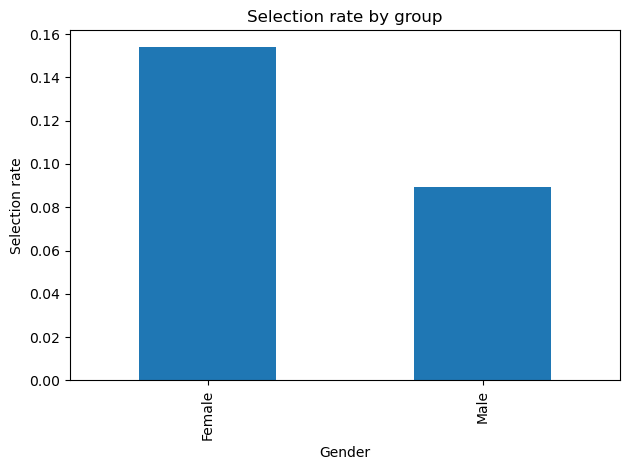

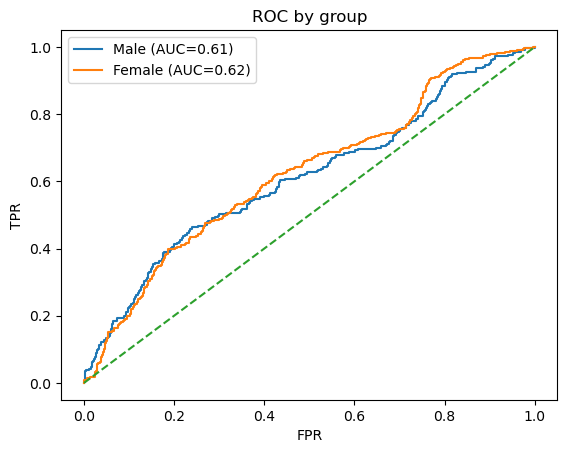

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# -----------------------------
# Bar plot of selection rates by protected group
# -----------------------------
# 'mf' is the Fairlearn MetricFrame computed earlier
sel = mf.by_group['selection_rate'].dropna()

# Plot selection rates as a bar chart
sel.plot(kind='bar', title='Selection rate by group')
plt.ylabel('Selection rate')
plt.tight_layout()
plt.show()

# -----------------------------
# ROC curves by group (if probabilities are available)
# -----------------------------
if y_prob is not None:
    groups_unique = groups.unique()  # unique values in protected attribute
    plt.figure()  # start a new figure

    for g in groups_unique:
        mask = (groups == g)  # Boolean mask for current group

        # Skip groups with too few samples
        if mask.sum() < 10:
            continue

        # Compute FPR, TPR for this group
        fpr, tpr, _ = roc_curve(y_test[mask], y_prob[mask])

        # Plot ROC curve for this group
        plt.plot(fpr, tpr, label=f'{g} (AUC={auc(fpr, tpr):.2f})')

    # Plot diagonal reference line
    plt.plot([0, 1], [0, 1], '--')

    # Labels, title, legend
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC by group')
    plt.legend()
    plt.show()

else:
    print('Probabilities not available for ROC by group.')
